In [1]:
import numpy as np
import matplotlib.pyplot as plt
from modularity import clustered_connections, print_weight_matrix, compute_density_matrix, plot_connection_matrices

# Modularity implementations

### **1. Structural Modularity** - Adjacency structure

Structural modularity conditions refer to variations in the network's graph, instantiated by designing the adjacency structure ($\mathbf{A}^{\mathrm{rec}}$).

**A) Modular structure:** Densely coupled neuronal clusters. Modify $m$, retaining overall density

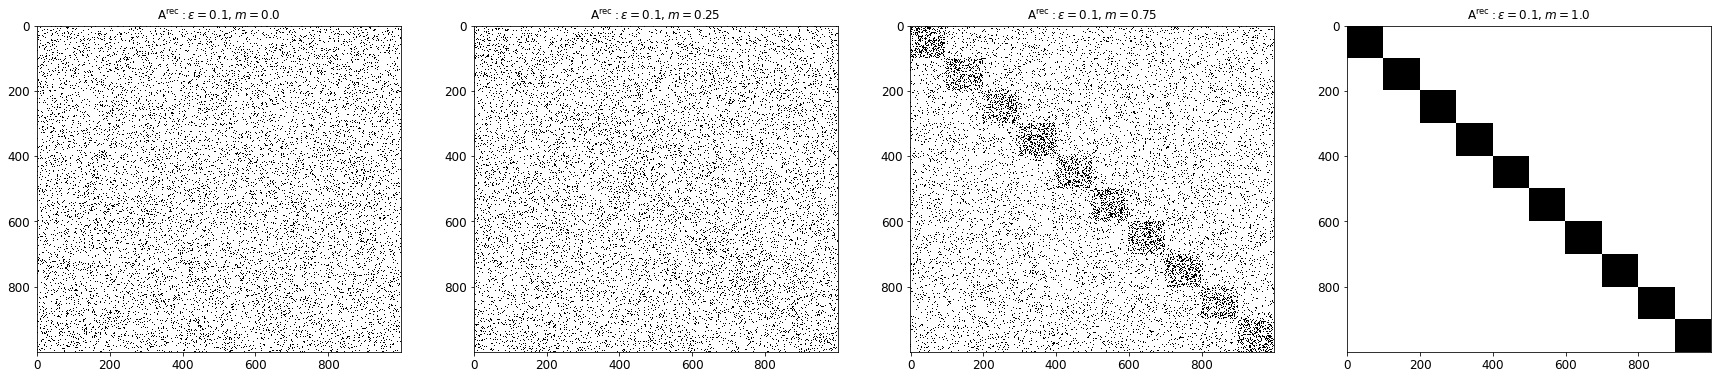

In [9]:
N = 1000
n_cluster = 10
epsilon = 0.1
m = [0., 0.25, 0.75, 1.]

fig, ax = plt.subplots(1, len(m), figsize=(30, 6))

for idx, mod in enumerate(m):
    A, s, t = clustered_connections(n_neurons=N, n_clusters=n_cluster, density=epsilon, modularity=mod)
    print_weight_matrix(A, label=r"$\mathrm{A^{rec}}: \epsilon="+"{}, m={}$".format(round(compute_density_matrix(A), 2), mod), ax=ax[idx])
    ax[idx].set_title(r"$\mathrm{A^{rec}}: \epsilon="+"{}, m={}$".format(round(compute_density_matrix(A), 2), mod))

**B) Modular projections:** Sparsely and randomly coupled neuronal clusters, with structured projections between them.(*Note:* requires stimulus-specific populations, i.e. equally structured $\mathrm{\mathbf{W}^{in}}$ and tasks with $N_{u}=N_{\mathrm{clusters}}$ input dimensions). Modify $m$ in between populations, retaining overall density.

**B.1. Sequential FF projections**

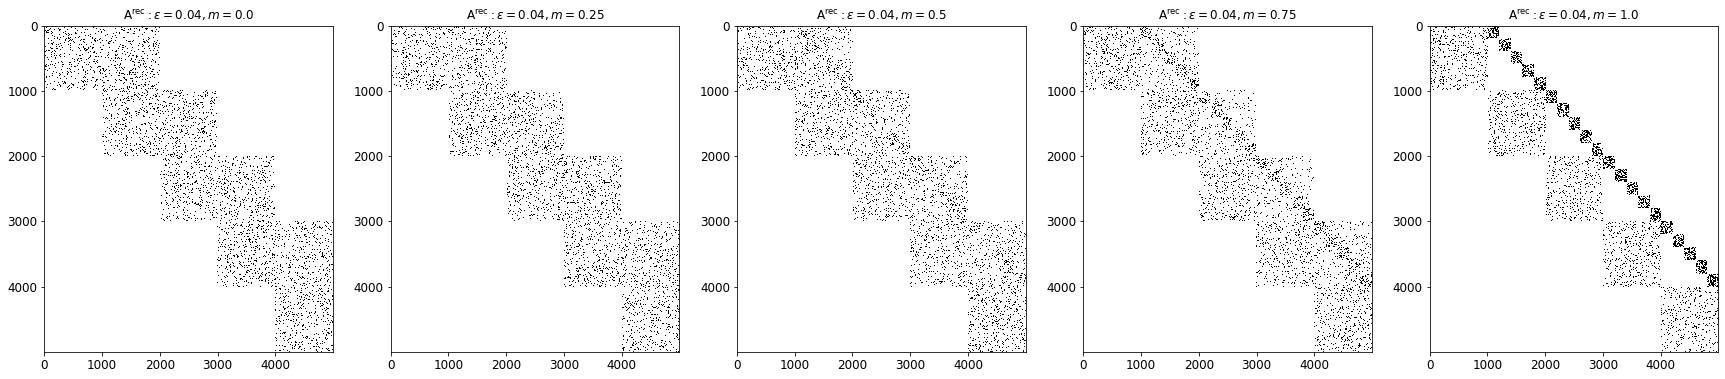

In [3]:
N = 1000
n_cluster = 5
n_stim = 5
epsilon = 0.1
m = [0., 0.25, 0.5, 0.75, 1.]

fig, ax = plt.subplots(1, len(m), figsize=(30, 6))

complete_A = np.empty((N*n_cluster, N*n_cluster))

for idx, mod in enumerate(m):
    
    # draw random connections for all modules
    A, cluster_ids, t = clustered_connections(n_neurons=N, n_clusters=n_cluster, density=epsilon, modularity=mod)
    
    for mod_i in range(n_cluster-1):
        # draw random connections for all modules
        A, cluster_ids, t = clustered_connections(n_neurons=N, n_clusters=n_cluster, density=epsilon, modularity=0.)
        complete_A[mod_i*N:(mod_i+1)*N, mod_i*N:(mod_i+1)*N] = A
        
        # draw FF connections between mod_i and mod_i+1
        FF, cluster_ids, t = clustered_connections(n_neurons=N, n_clusters=n_cluster, density=epsilon, modularity=mod)
        complete_A[mod_i*N:(mod_i+1)*N, (mod_i+1)*N:(mod_i+2)*N] = FF
    
    # draw random connections for last modules
    A, cluster_ids, t = clustered_connections(n_neurons=N, n_clusters=n_cluster, density=epsilon, modularity=0.)
    complete_A[(n_cluster-1)*N:n_cluster*N, (n_cluster-1)*N:n_cluster*N] = A
    
    print_weight_matrix(complete_A, label=r"$\mathrm{A^{rec}}: \epsilon="+"{}, m={}$".format(round(compute_density_matrix(complete_A), 2), mod), ax=ax[idx])

**B.2. Sequential FF+FB projections**

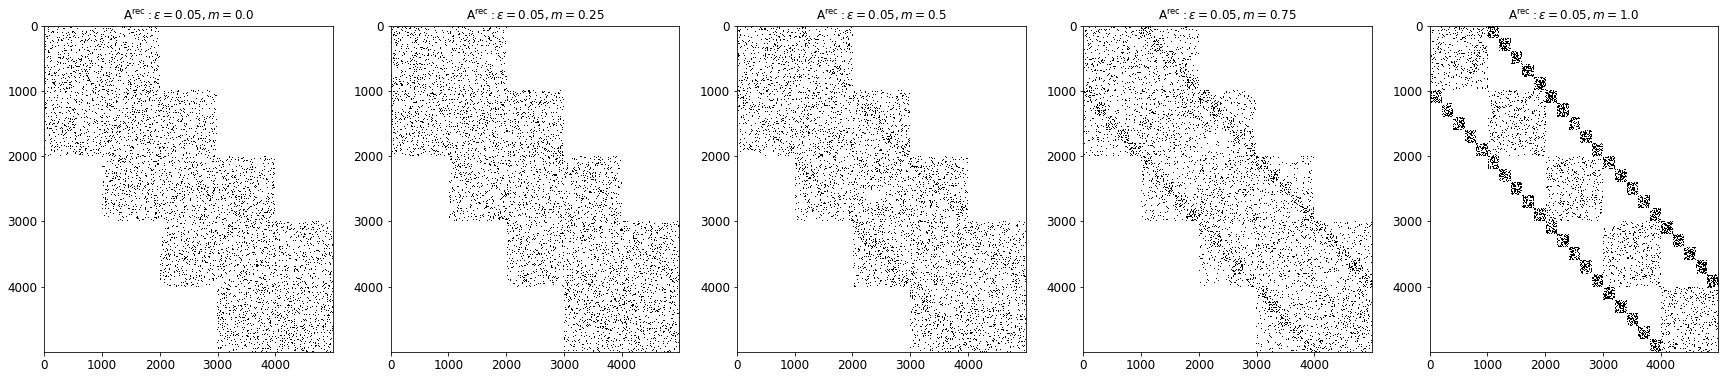

In [4]:
N = 1000
n_cluster = 5
n_stim = 10
epsilon = 0.1
m = [0., 0.25, 0.5, 0.75, 1.]

fig, ax = plt.subplots(1, len(m), figsize=(30, 6))

complete_A = np.empty((N*n_cluster, N*n_cluster))

for idx, mod in enumerate(m):
    
    # draw random connections for all modules
    A, cluster_ids, t = clustered_connections(n_neurons=N, n_clusters=n_cluster, density=epsilon, modularity=mod)
    
    for mod_i in range(n_cluster-1):
        # draw random connections for all modules
        A, cluster_ids, t = clustered_connections(n_neurons=N, n_clusters=n_cluster, density=epsilon, modularity=0.)
        complete_A[mod_i*N:(mod_i+1)*N, mod_i*N:(mod_i+1)*N] = A
        
        # draw FF connections between mod_i and mod_i+1
        FF, cluster_ids, t = clustered_connections(n_neurons=N, n_clusters=n_cluster, density=epsilon, modularity=mod)
        complete_A[mod_i*N:(mod_i+1)*N, (mod_i+1)*N:(mod_i+2)*N] = FF
        
        # draw FB connections between mod_i+1 and mod_i
        FB, cluster_ids, t = clustered_connections(n_neurons=N, n_clusters=n_cluster, density=epsilon, modularity=mod)
        complete_A[(mod_i+1)*N:(mod_i+2)*N, mod_i*N:(mod_i+1)*N] = FF
    
    # draw random connections for last modules
    A, cluster_ids, t = clustered_connections(n_neurons=N, n_clusters=n_cluster, density=epsilon, modularity=0.)
    complete_A[(n_cluster-1)*N:n_cluster*N, (n_cluster-1)*N:n_cluster*N] = A
    
    print_weight_matrix(complete_A, label=r"$\mathrm{A^{rec}}: \epsilon="+"{}, m={}$".format(round(compute_density_matrix(complete_A), 2), mod), ax=ax[idx])

**B.3. Increasing cluster sizes (rectangular clusters, not squared)**

Things get more complicated if there's overlap, but this is also partially supported.

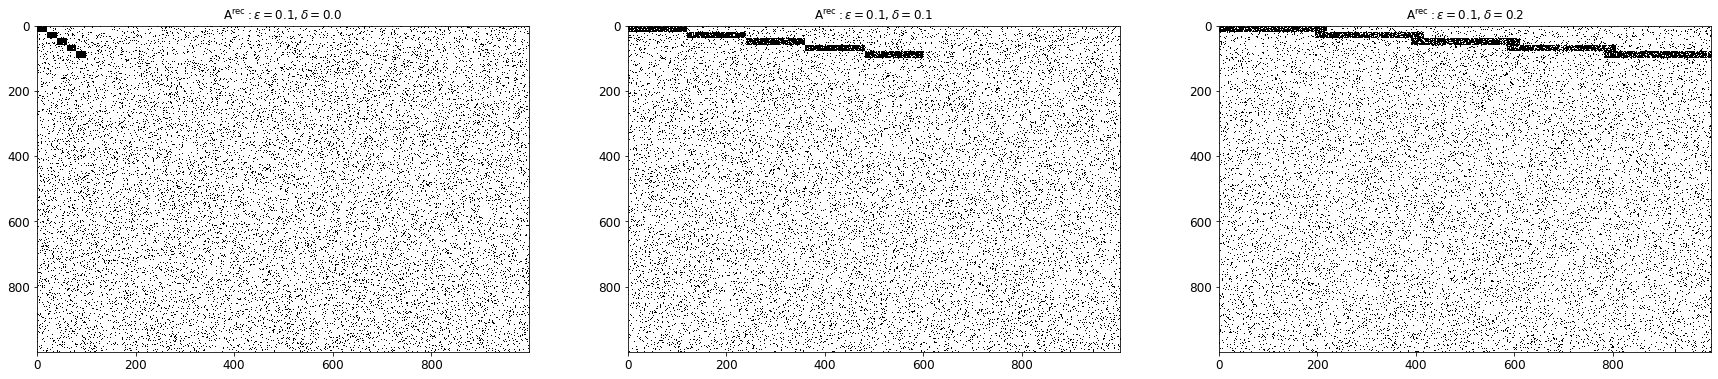

In [74]:
N = 1000
n_cluster = 5
epsilon = 0.1
m = 0.9
delta = [0., 0.1, 0.2]
d0 = 0.02  # controls the size of source clusters, it's rho0 in the code

fig, ax = plt.subplots(1, len(delta), figsize=(30, 6))

for idx, d in enumerate(delta):
    A, s, t = clustered_connections(n_neurons=N, n_clusters=n_cluster, density=epsilon, modularity=m, delta=d, rho0=d0)
    print_weight_matrix(A, label=r"$\mathrm{A^{rec}}: \epsilon="+"{}, \delta={}$".format(round(compute_density_matrix(A), 2), mod), ax=ax[idx])
    ax[idx].set_title(r"$\mathrm{A^{rec}}: \epsilon="+"{}, \delta={}$".format(round(compute_density_matrix(A), 2), d))

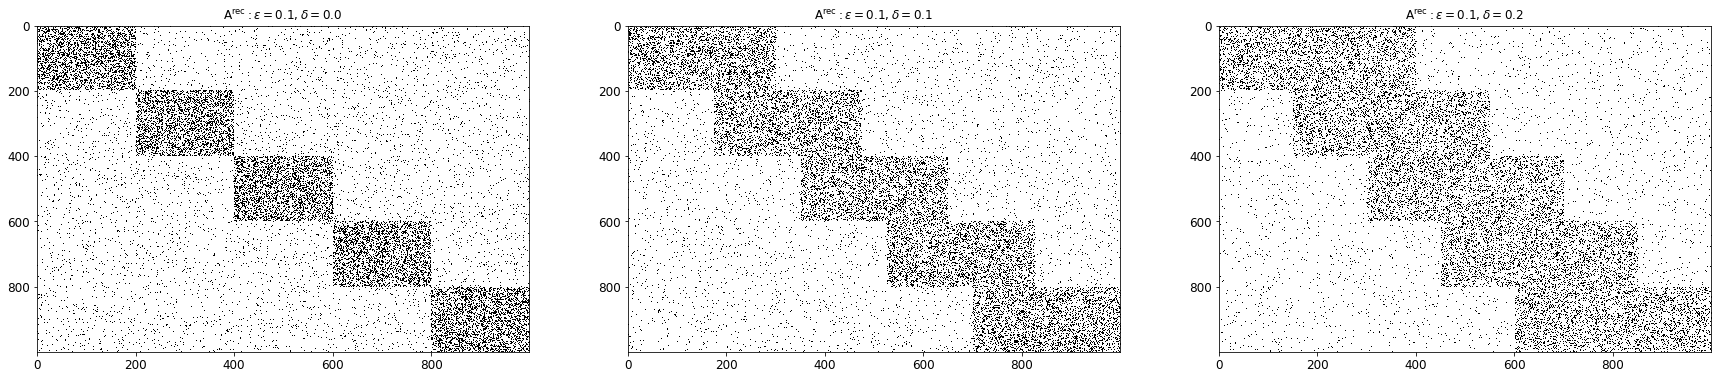

In [8]:
d0 = 0.2  # controls the size of source clusters, it's rho0 in the code

fig, ax = plt.subplots(1, len(delta), figsize=(30, 6))

for idx, d in enumerate(delta):
    A, s, t = clustered_connections(n_neurons=N, n_clusters=n_cluster, density=epsilon, modularity=m, delta=d, rho0=d0)
    print_weight_matrix(A, label=r"$\mathrm{A^{rec}}: \epsilon="+"{}, \delta={}$".format(round(compute_density_matrix(A), 2), mod), ax=ax[idx])
    ax[idx].set_title(r"$\mathrm{A^{rec}}: \epsilon="+"{}, \delta={}$".format(round(compute_density_matrix(A), 2), d))

### **2. Functional Modularity** - Synaptic efficacy structure

Functional modularity conditions refer to variations in the network's weight matrix, instantiated by designing the weight distribution ($\mathbf{W}^{\mathrm{rec}}$).

**A) Cell Assemblies:** Assemblies of neurons defined as strongly connected sub-populations, embedded in a randomly coupled network

In [1]:
from sklearn.preprocessing import StandardScaler


N = 1000
n_assemblies = 5
epsilon = 0.1
base_w = 1.
w_scale = [0., 1., 5., 10.]

ss = StandardScaler()

fig, ax = plt.subplots(1, len(w_scale), figsize=(30, 6))

for idx, w in enumerate(w_scale):
    mask, cluster_ids, _ = clustered_connections(n_neurons=N, n_clusters=n_assemblies, density=1./n_assemblies, modularity=1.)
    mask = (mask* (base_w*w)) + base_w

    W, cluster_ids, t = clustered_connections(n_neurons=N, n_clusters=n_assemblies, density=epsilon, modularity=0.)
    if w > 0.:
        W *= base_w
        W *= mask
    print_weight_matrix(W, label=r"$\mathrm{W^{rec}}: \bar{w}="+"{}, \gamma={}$".format(round(np.mean(W), 2), w), ax=ax[idx], cmap="viridis")

NameError: name 'plt' is not defined

In [2]:
N = 1000
n_assemblies = 5
epsilon = 0.1
base_w = 1.
w_scale = [1.]
w = 10
ss = StandardScaler()
mask, cluster_ids, _ = clustered_connections(n_neurons=N, n_clusters=n_assemblies, density=1./n_assemblies, modularity=1.)
mask = (mask* (base_w*w)) + base_w

W, cluster_ids, t = clustered_connections(n_neurons=N, n_clusters=n_assemblies, density=epsilon, modularity=0.)
if w > 0.:
    W *= base_w
    W *= mask

NameError: name 'clustered_connections' is not defined

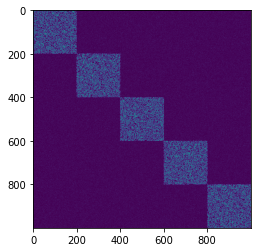

In [70]:
plt.imshow(W)

In [66]:
W

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])